## Observations and Insights 

In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_data_df = pd.merge(pd.read_csv(study_results_path), pd.read_csv(mouse_metadata_path),
                           how = 'left' , on = 'Mouse ID')
combine_data_df.head()

# Display the data table for preview



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [58]:
# Checking the number of mice.
mouse_count = combine_data_df["Mouse ID"].count()
mouse_count

1893

In [59]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combine_data_df[combine_data_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [62]:
# Optional: Get all the data for the duplicate mouse ID. 
clean_data = combine_data_df.loc[combine_data_df["Mouse ID"]!= "g989"]
len(clean_data["Mouse ID"].unique())

248

## Summary Statistics

In [63]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
summary_df 


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [64]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

data_summary = clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
data_summary



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64


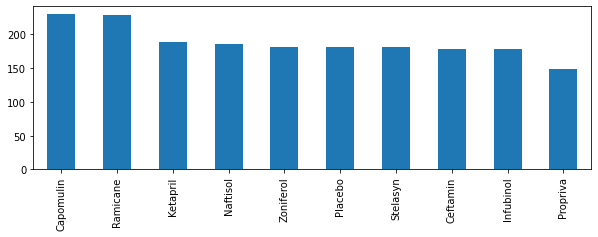

In [71]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#summary_df.plot(kind="bar", figsize=(10,3))
count = clean_data["Drug Regimen"].value_counts()
print(count)
count.plot(kind="bar", figsize=(10,3))
plt.show()


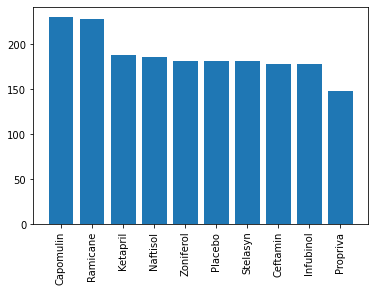

In [72]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(count.index.values, count.values)
plt.xticks(rotation =90)
plt.show()

In [74]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#pull the sex info
gender_count = clean_data["Sex"].value_counts()
gender_count



Male      958
Female    922
Name: Sex, dtype: int64

Text(0, 0.5, '')

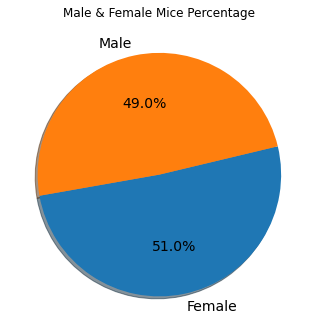

In [75]:
# pie plot showing the distribution of female versus male mice using pandas
plt.figure(figsize=(12,6))
ax1 = plt.subplot(121, aspect="equal")
gender_count.plot(kind="pie", y = "Mouse ID", ax=ax1, autopct='%1.1f%%',
              startangle=190, shadow=True, labels=gender_df["Sex"], legend = False, fontsize=14)

plt.title("Male & Female Mice Percentage")
plt.xlabel("")
plt.ylabel("")


In [77]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


(-1.1403714450628375,
 1.1360824730890227,
 -1.2091979810588471,
 1.1377438902380557)

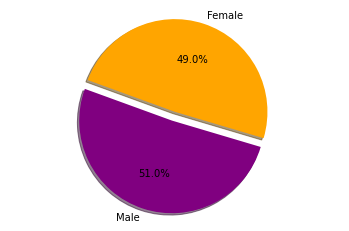

In [78]:
#Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Females", "Males"]
colors = ["purple", "orange"]
explode = (0.1, 0)
plt.pie(gender_count.values, explode=explode, labels=gender_count.index.values, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [80]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

filtered_df = combine_data_df.loc[(combine_data_df["Drug Regimen"] == "Capomulin") | 
                                  (combine_data_df["Drug Regimen"] == "Ramicane") | 
                                  (combine_data_df["Drug Regimen"] == "Infubinol") | 
                                  (combine_data_df["Drug Regimen"] == "Ceftamin"), :]

filtered_df = filtered_df.sort_values("Timepoint", ascending = False)
filtered_df.head().reset_index()

# Start by getting the last (greatest) timepoint for each mouse
last_time_point = clean_data.groupby("Mouse ID").max()["Timepoint"]
last_time_point = last_time_point.reset_index()
last_time_point

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = last_time_point.merge(clean_data, on=["Mouse ID", "Timepoint"], how = "left")
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [82]:
# Put treatments into a list for for loop (and later for plot labels)
treatment =["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor = merge_df.loc[merge_df["Drug Regimen"]== drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol.append(tumor)
    
    # Determine outliers using upper and lower bounds
    

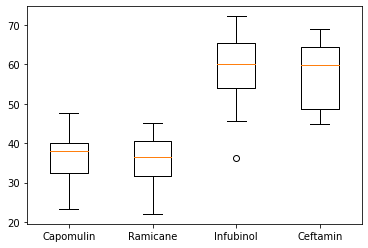

In [85]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol, labels=treatment)
plt.show()

## Line and Scatter Plots

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#pulling Capomulin Data

capomulin_df = combine_data_df.loc[combine_data_df["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()



,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [28]:
# mouse data

capomulin_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
capomulin_mouse

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0
5,15,s185,Capomulin,Female,3,17,25,33.949940,0
6,16,s185,Capomulin,Female,3,17,30,32.959671,1
7,17,s185,Capomulin,Female,3,17,35,28.328531,1
8,18,s185,Capomulin,Female,3,17,40,25.472143,1
9,19,s185,Capomulin,Female,3,17,45,23.343598,1


<AxesSubplot:xlabel='Timepoint'>

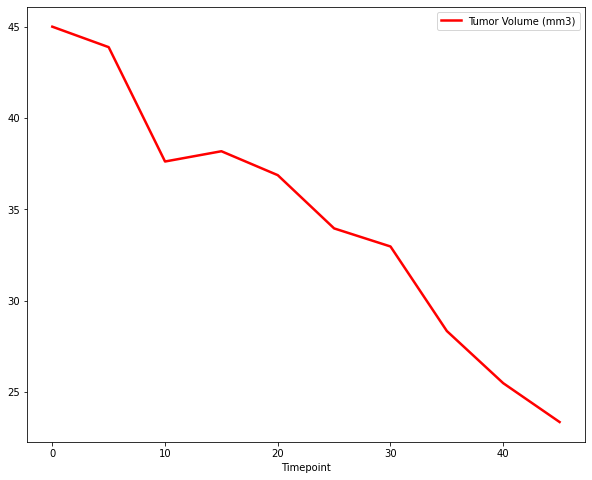

In [30]:
# arrange columns
capomulin_mouse = capomulin_mouse.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
capomulin_mouse = capomulin_mouse.reset_index(drop=True)
capomulin_mouse.set_index("Timepoint").plot(figsize=(10,8), linewidth=2.5, color="red")

In [33]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tumor_weight_df =capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
tumor_weight_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,s185,17,45.000000
1,s185,17,43.878496
2,s185,17,37.614948
3,s185,17,38.177232
4,s185,17,36.866876


In [34]:
#find the average tumor volume per mouse

ave_tumor_vol = pd.DataFrame(tumor_weight_df.groupby(["Mouse ID", "Weight (g)"])
                             ["Tumor Volume (mm3)"].mean()).reset_index() 
ave_tumor_vol.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [40]:
#rename tumor Volume with tumor average
ave_tumor_vol = ave_tumor_vol.rename(columns={"Tumor Volume (mm3)": 
                                              "Average Tumor Volume (mm3)"})
ave_tumor_vol.head()                                           

,Mouse ID,Weight (g),Average Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


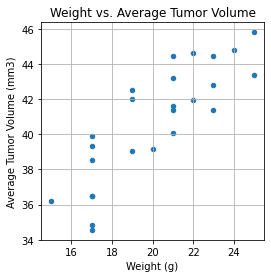

In [41]:
#scatter plot
ave_tumor_vol.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume (mm3)", grid=True, figsize=(4,4), title="Weight vs. Average Tumor Volume")
plt.show()

## Correlation and Regression

In [46]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = ave_tumor_vol['Average Tumor Volume (mm3)']
avg_tumor_capo = ave_tumor_vol['Weight (g)']

correlation = st.pearsonr(mouse_weight,avg_tumor_capo)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


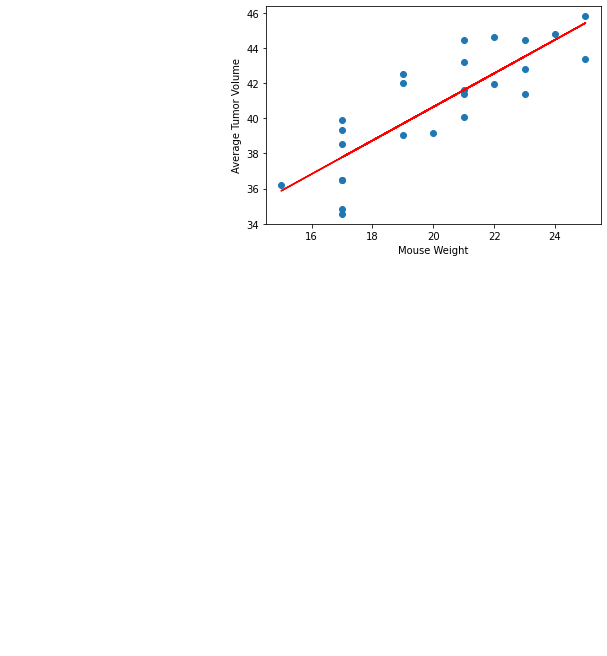

In [54]:
# import linregress
from scipy.stats import linregress

#add linear regresion

x_values = ave_tumor_vol["Weight (g)"]
y_values = ave_tumor_vol["Average Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()